## ML + Evaluation - Dataset 1

#### Import libraries and dataset


In [10]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv("../data/processed/dataset_1_processed.csv")

X = df.drop(columns=["CLASS_LABEL"])
y = df["CLASS_LABEL"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define cross-validation strategy (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### CatBoost

##### Base CatBoost

In [ ]:
base_catboost = CatBoostClassifier(verbose=0)
base_catboost.fit(X_train, y_train)

# Evaluate model
y_pred_base = base_catboost.predict(X_test)

print("Base CatBoost Classification Report:")
print(classification_report(y_test, y_pred_base))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_base), annot=True, fmt="d", cmap="Blues")
plt.title("Base CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### GridSearch CatBoost

In [11]:
catboost_grid = {
    'iterations': [100, 300, 500, 700],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

catboost_model = CatBoostClassifier(verbose=0)
grid_search = GridSearchCV(catboost_model, param_grid=catboost_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_catboost = grid_search.best_estimator_
print(f"Best CatBoost Model: {grid_search.best_params_}")

# Save model
joblib.dump(best_catboost, "../models/dataset_1/catboost_ds_1.pkl")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best CatBoost Model: {'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.05}


['../models/dataset_1/catboost_ds_1.pkl']

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1000
           1       0.89      0.93      0.91      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



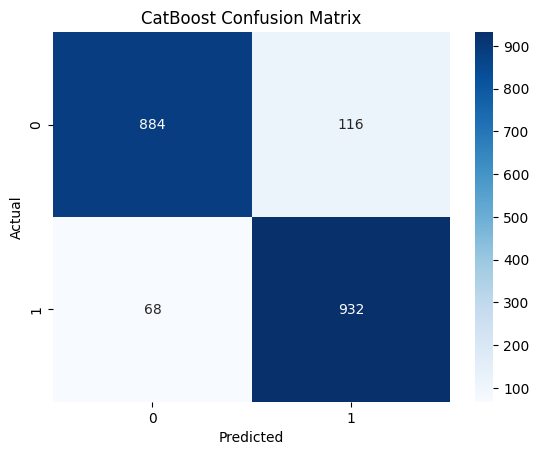

In [12]:
# Evaluate CatBoost
y_pred_catboost = best_catboost.predict(X_test)

print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_catboost), annot=True, fmt="d", cmap="Blues")
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()